# MODELO OSMÓSIS
### Baylor, 2020


## 1. Descripción
### 1.1 Potencial de membrana
El potencial de membrana $\large\psi$ depende de las concentraciones de iones en el interior. Para ello, la diferencia de potencial en el capacitor:

\begin{equation}
\large \psi = \frac{Q}{C} = \frac{F \;\; V}{C_m \;\; S} \bigg([K^+] + [Na^+] + [H^+] - [Cl^-] - [P]_{i_0} \bigg) \;\;\;\; [V] \;\;\;\;\;\;(1)
\end{equation}

En general:

\begin{equation}
\large \psi = \frac{Q}{C} = \frac{F \;\; V}{C_m \;\; S} \bigg(\sum_{k=1}^{n} z_i[C_k]_i - [P]_{i_0}\bigg) \;\;\;\;\;\;\;\;\;\;(1)
\end{equation}

En donde:

* *$F$* es la constante de Faraday $[mol/C]$
* *$V$* es el volumen que encierra la membrana $[L]$
* *$Cm$* es la capacitancia específica $[F/cm^2]$
* *$S$* es la superficie de la membrana $[cm^2]$
* *$[C_i]$* es la concentración interna *_k_* de los *_n_* iones al interior de la membrana $[M]$
* *$z_i$* es la valencia del ión *_i_* $[adimensional]$
* *$[P]_{i_0}$* es la concetración de las partículas de Donnan $[M]$



### 1.2. Osmosis
Para considerar la permeación de agua por la presión osmótica es necesario mantener la siguiente relación:
\begin{equation}
\Large {\sum_i^n([C_{in}]_i) = \sum_j^n([C_{ex}]_j)}  \;\;\;\;\;\;\ (2)
\end{equation}

Donde:
* $\large[C_{in}]_i$ es la i concentración interna de los n iones (intracelular)
* $\large[C_{ext}]_i$ es la i concetración externa de los n iones (extracelular)

Así, de ec.2:
\begin{equation}
\large \frac{\sum_i^n([Q_{in}]_i)}{Vol_{in}} = \sum_j^n([C_{ex}]_j)
\end{equation}

\begin{equation}
\Large Vol_{in}= \frac{\sum_i^n([Q_{in}]_i)}{\sum_j^n([C_{ex}]_j)}  \;\;\;\;\;\; \big[cm^3\big] \;\;\;\;\; (3)
\end{equation}




### 1.3. Flujos pasivos

Canales de H+, K+, Ca2+ y Na+ que permiten el movimiento pasivo de estos iones. La electrodifusión está determinada por la ecuación de flujo de Goldman–Hodgkin–Katz:

\begin{equation}
J_{[C]}= P_{[C]}   S  \frac{z_C^2U}{1-e^{-z_CU}}  \bigg([C]_i - [C]_e e^{-z_CU}\bigg)   \;\;\;\;\;\;\;\bigg[\frac{mol}{cm^2}\bigg]\;\; (4)
\end{equation}

El flujo pasivo de $K^+$ se describe según:
\begin{equation}
J_{K^{+}}= P_{K^{+}}    \frac{U}{1-e^{-U}}  \bigg([K^{+}]_e   e^{-U} - [K^{+}]_i\bigg) \;\;\;\;\;\;\;\;\;\;\bigg[\frac{mol}{cm^2}\bigg]\;\; (7)
\end{equation}


\begin{equation}
U = \frac{\Delta \psi F} { R T} \;\;\;\;\;\; (6)
\end{equation}

Tal que:
* $P_H$: permeabilidad a H^{+} por unidad de área [cm/s].
* $U$: potencial de membrana reducido [adimensional].

El flujo pasivo de los iones restantes se describe de forma similar, de acuerdo a las siguientes ecuaciones:

\begin{equation}
J_{Na^{+}}= P_{Na^{+}}  \frac{U}{1-e^{-U}}  \bigg([Na^{+}]_e   e^{-U} - [Na^{+}]_i\bigg)  \;\;\;\;\bigg[\frac{mol}{cm^2}\bigg]\;\; (8)
\end{equation}

\begin{equation}
J_{Cl^{-}}= P_{Cl^{-}}  \frac{U}{1-e^{-U}}  \bigg([Cl{_f}^{-}]_e   e^{-U} - [Cl{_f}^{-}]_i\bigg)  \;\;\;\;\bigg[\frac{mol}{cm^2}\bigg]\;\; (9)
\end{equation}


### 1.4. Bomba $Na^+/K⁺$

\begin{equation}
\large Na^+_{pump} = \frac{Pmax}{1+\frac{KD3}{[Na]_i^3}} \;\;\;\;\;\;\bigg[\frac{mol}{cm^2}\bigg]\;\;\;\; (10)
\end{equation}

\begin{equation}
\large K^+_{pump} = \frac{Na^+_{pump}}{S_{NaK}}   \;\;\;\;\;\;\;\;\;\;\;\;\bigg[\frac{mol}{cm^2}\bigg]\;\;\;\; (11)
\end{equation}

# 2. Algoritmo


1. Se calculan las densidades de flujo de la bomba $Na^+/K^+$. La función "Na_pump" está en dependencia de la concentración de $Na^+$, la cual se calcula a partir de la cantidad de $Na^+$ (en $mol$), dividido por el volumen, calculado con la función "volumen".
2. Se calculan los flujos pasivos de $Na^+$, $K^+$, $Cl^-$.
3. Se suman las densidades de flujos netos para cada ión, y se multiplican por la superficie (en $cm^2$) de la membrana con la función "area".


Na_i= 9.4033626507325
K_i= 135.5940453678556
Cl_i= 6.345938338803029
P_i= 138.6566536426089
Osmmolarity_i= 289.99999999999994
Osmmolarity_f= 290.0
Final Vm= -81.69466409140712


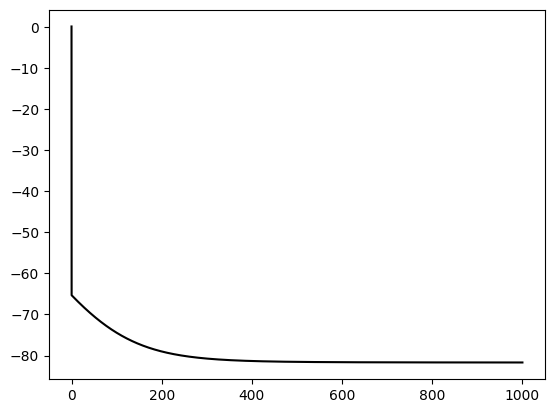

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def volumen(na_i,k_i,cl_i): #cm^-3
    return (na_i+k_i+cl_i+p_i_0)/(na_o+k_o+cl_o)

def radio(na_i,k_i,cl_i): #cm
    return (0.75*volumen(na_i,k_i,cl_i)/np.pi)**(1/3)

def area(na_i,k_i,cl_i):  #cm^-2
    return 4*np.pi*radio(na_i,k_i,cl_i)**2

def Vm(na_i,k_i,cl_i): #Volt -> C/mol*(mol/((F/cm^2)*cm^2)-> C/F -> Volt
    return (F/RToF)*(na_i+k_i-cl_i-p_i_0)/(area(na_i,k_i,cl_i)*Cm)
    
def fluxNa(na_i,k_i,cl_i): # mol/cm^2
    return P_na*Vm(na_i,k_i,cl_i)*(na_i/volumen(na_i,k_i,cl_i)-na_o*np.exp(-Vm(na_i,k_i,cl_i)))/(1.-np.exp(-Vm(na_i,k_i,cl_i)))

def fluxK(na_i,k_i,cl_i): # mol/cm^2 
    return P_k*Vm(na_i,k_i,cl_i)*(k_i/volumen(na_i,k_i,cl_i)-k_o*np.exp(-Vm(na_i,k_i,cl_i)))/(1.-np.exp(-Vm(na_i,k_i,cl_i)))

def fluxCl(na_i,k_i,cl_i): # mol/cm^2 
    return P_cl*Vm(na_i,k_i,cl_i)*(cl_i/volumen(na_i,k_i,cl_i)*np.exp(-Vm(na_i,k_i,cl_i))-cl_o)/(1.-np.exp(-Vm(na_i,k_i,cl_i)))

def Na_pump(na_i,k_i,cl_i): #mol/cm^2
    return Pmax/(1+KD3/(na_i/volumen(na_i,k_i,cl_i))**3)

def K_pump(na_i,k_i,cl_i): #mol/cm^2
    return Na_pump(na_i,k_i,cl_i)/S

def C_iones(y,t):
    dy=[0,0,0]
    
    Na_leak   =  fluxNa(y[0],y[1],y[2])
    Na_pump_t =  Na_pump(y[0],y[1],y[2])
    
    dy[0]=-(Na_leak + Na_pump_t)*area(y[0],y[1],y[2])
    dy[1]=-(fluxK(y[0],y[1],y[2])+K_pump(y[0],y[1],y[2]))*area(y[0],y[1],y[2])
    dy[2]=-fluxCl(y[0],y[1],y[2])*area(y[0],y[1],y[2])
    return dy

# Constantes
R=8.314
F=96485.
T=303.
RToF=R*T/F

# Permeabilidades
#Permeabilidades
P_na_ratio=0.01 #relación de P_Na con respecto a P_K
P_cl_ratio=2    #relación de P_Cl con respecto a P_K
P_k=1e-6
P_na=P_na_ratio*P_k
P_cl=P_cl_ratio*P_k

#P_k  = 7.1e-07
#P_na=P_na_ratio*P_k
#P_na = 9.6e-07
#P_cl = 1.2e-05
#P_H = 6e-05


#Valencias
z_na=1.
z_k=1.
z_cl=1.

# Célula y geometría
Cm=1e-6
radio_0=5e-4
area_0=4*np.pi*radio_0**2
volumen_0=(4/3)*np.pi*radio_0**3
V_0=0.1

# Concentraciones
na_o=140e-6
k_o=5e-6
cl_o=na_o+k_o

na_i_0=5e-6*volumen_0
k_i_0=140e-6*volumen_0
cl_i_0=14.5e-6*volumen_0
p_i_0=(na_i_0+k_i_0-cl_i_0)

deltac=Cm*V_0*.001*area_0/F #moles
k_i_0=k_i_0+deltac/2
p_i_0=p_i_0-deltac/2

osmelein0=(na_i_0+k_i_0+cl_i_0+p_i_0)/volumen_0
Pmax=1e-11
S=-1.5
KD3=(1e-5)**3

t_N=1000
t_start=0.0
t_end=float(t_N)
N_steps=int(t_N*t_end)
t=np.linspace(t_start,t_end,N_steps+1)

init0=na_i_0
init1=k_i_0
init2=cl_i_0
y_init=[init0,init1,init2]
y=odeint(C_iones,y_init,t,hmax=1e-2)

Vm_final=Vm(y[:,0],y[:,1],y[:,2])*RToF*1000
plt.plot(t,Vm_final,'k')

N_volume=volumen(y[N_steps,0],y[N_steps,1],y[N_steps,2])/volumen_0
Final_Nain=1e6*y[N_steps,0]/volumen(y[N_steps,0],y[N_steps,1],y[N_steps,2])
Final_Kin=1e6*y[N_steps,1]/volumen(y[N_steps,0],y[N_steps,1],y[N_steps,2])
Final_Clin=1e6*y[N_steps,2]/volumen(y[N_steps,0],y[N_steps,1],y[N_steps,2])
Final_Pin=1e6*p_i_0/(N_volume*volumen_0)
Final_osm=Final_Nain+Final_Kin+Final_Clin+Final_Pin
Final_vm=1000*Vm(y[N_steps,0],y[N_steps,1],y[N_steps,2])*RToF

print ("Na_i=", Final_Nain)
print ("K_i=", Final_Kin)
print ("Cl_i=", Final_Clin)
print ("P_i=", Final_Pin)
print ("Osmmolarity_i=", osmelein0*1e6)
print ("Osmmolarity_f=", Final_osm)
print ("Final Vm=", Final_vm)
#print ("Final Volumen ratio", N_volume)

# 3. Modificación del algoritmo para lisosomas

Se modificó el algoritmo anterior para usarlo como un modelo de homeostasis lisosomal. Para ello:
* Se agregó el flujo pasivo de protones ($H^+$) a través de la ecuación de flujo de GHK.
* Se agregó una bomba V-ATPasa. (Ishida, 2013)
* Se quitó la bomba $Na^+/K^+$
* Se intentó reducir el volumen que encierra la membrana a dimensiones similares a las descritas para lisosomas. (Ishida, 2013) (Xu, 2015)

## 3.1. Agregar flujo de protones

### 3.1.1. Flujo pasivo de H^+
La electrodifusión de $H^+$ está determinada por la ecuación de flujo de Goldman–Hodgkin–Katz:

\begin{equation}
J_{H^{+}}= P_{H^{+}} S  \frac{U}{1-e^{-U}} \bigg(10^{-pH_{e}}  e^{-U} - 10^{-pH_{i}}\bigg)   \;\;\;\;\bigg[\frac{mol}{cm^2}\bigg]\;\; (5)
\end{equation}


### 3.1.2. V-ATPasa
Bombea protones al lumen lisosomal en contra de su gradiente electroquíímico usando la energía de la hidrólisis de ATP. Su tasa de bombeo depende del pH luminal y del potencial de membrana, como se ve en la ecuación (13): 
\begin{equation}
J_{VATP} = N_{VATP}  J_{VATP1} (pH_L, \Delta \psi)  \;\;\;\;\;\; (12)
\end{equation}

Tal que: 
* $N_{VATP}$: número de V-ATPasas de la membrana lisosomal.
* $J_{VATP1}$: tasa de bombeo de protones de una V-ATPasa bajo diferentes potenciales de membrana y gradientes de pH, de acuerdo al modelo mecanoquímico de Grab *et al* (2001), el cual fue calibrado con datos experimentales de voltaje-corriente. En Figura 2 se describe la superficie de $J_{VATP1}$,

![texto alternativo](https://drive.google.com/uc?export=view&id=1aY_NE1S1drWJLBlrvH3yvlsQpkl4N6o5)

**Figura 2.** *Supeficie de bombeo de protones de una bomba V-ATPasa (Ishida, 2013)*


## 3.1.2. Reducir volumen

Se intentó reducir el volumen que encierra la membrana. El modelo de Baylor inicia con un volumen de 5.24e-10 cm^3.
Para lisosomas:
* **(Ishida, 2013):** 1.65e-13 $cm^3$ (1.65e-16 Lts)
* **(Xu, 2015):** 5.23e-16 - 6.54e-14 $cm^3$  (diámetros de 100-500nm)


In [23]:
# Cálculo de volumen (Xu,2015)
radio_0 = (100e-9)/2 #m
volumen_0=(4/3)*np.pi*radio_0**3
print("Vol Min Xu:",volumen_0*1e6)
radio_0 =(500e-9)/2 #m
volumen_0=(4/3)*np.pi*radio_0**3
print("Vol Max Xu:",volumen_0*1e6)
# Radio mínimo 
radio_0 = 2.4e-4 #cm
volumen_0=(4/3)*np.pi*radio_0**3
print("Vol Min:",volumen_0)

Vol Min Xu: 5.235987755982988e-16
Vol Max Xu: 6.544984694978735e-14
Vol Min: 5.790583579096707e-11


## 3.2. Algoritmo (mod)

Na_i= 4.629403951076003 [mM]
K_i= 77.87065586076908 [mM]
Cl_i= 18.772215014187026 [mM]
P_i= 63.72679636196972 [mM]
H_i= 0.000991907732642289 [mM]
Osmmolarity_i= 140.002
Osmmolarity_f= 165.00006309573445
Final Vm= 16.172015392492707 [mV]
Final Volumen ratio= 1.082762628304456
FInal pH 1= 6.9158804664545395
FInal pH 2= 5.99662120579996


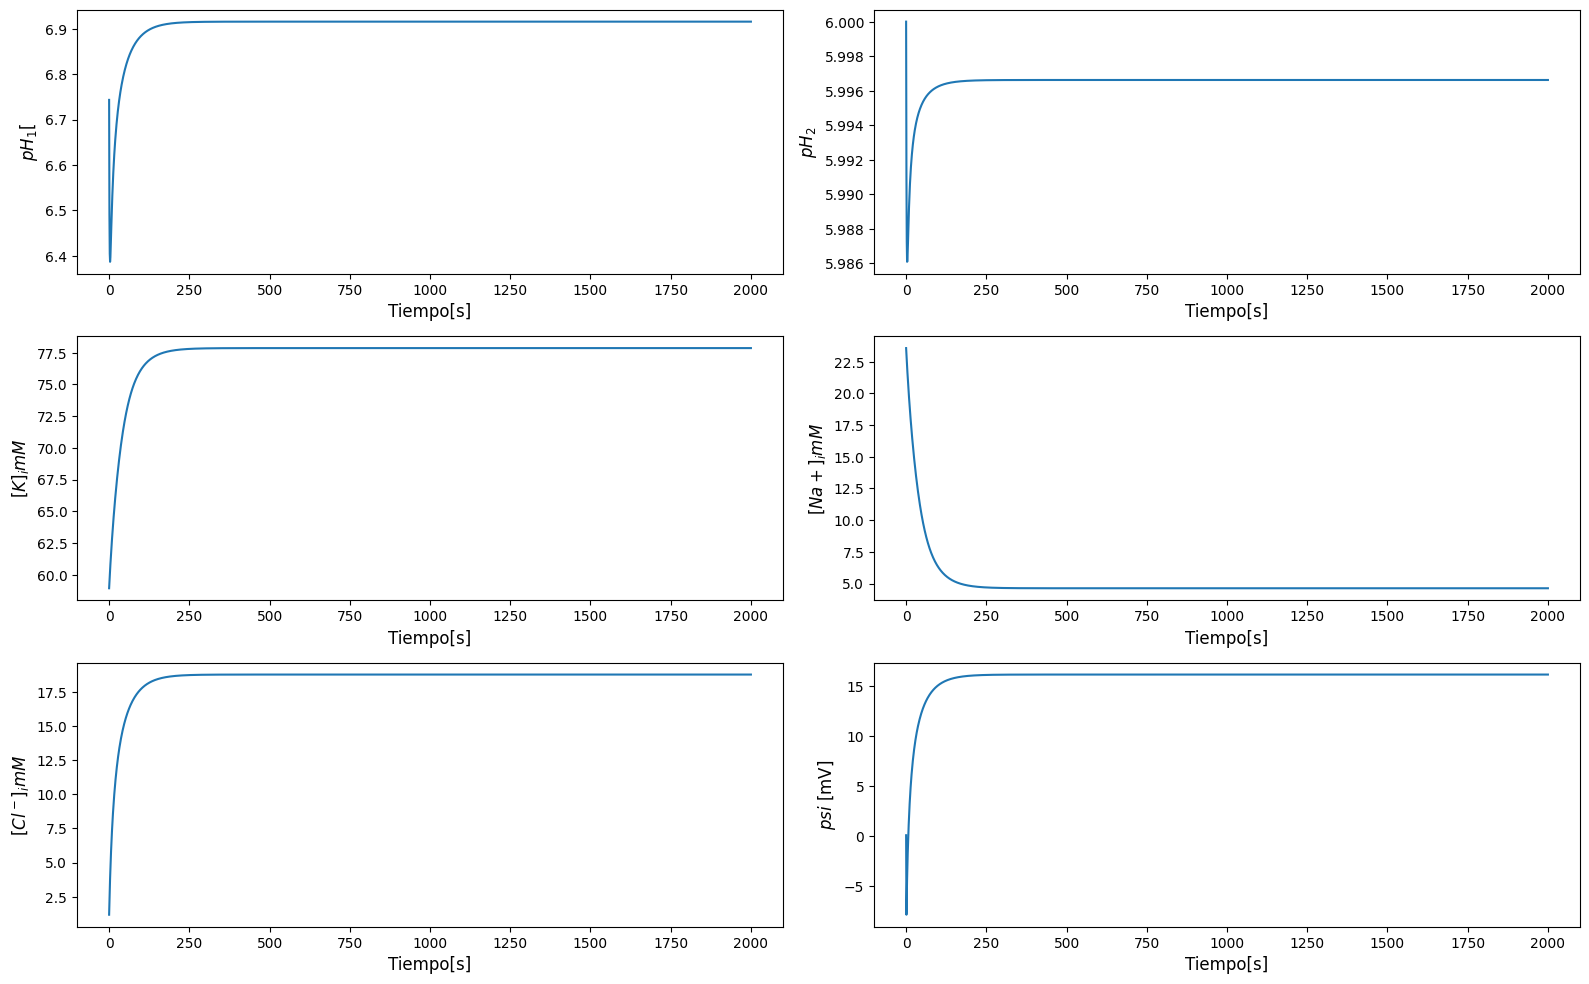

In [22]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from scipy.io import loadmat
from scipy import interpolate
import matplotlib.gridspec as gridspec

def volumen(na_i,k_i,cl_i,h_i): #cm^-3
    return (na_i+k_i+cl_i+h_i+p_i_0)/(na_o+k_o+cl_o+h_o)

def radio(na_i,k_i,cl_i,h_i): #cm
    return (0.75*volumen(na_i,k_i,cl_i,h_i)/np.pi)**(1/3)

def area(na_i,k_i,cl_i,h_i):  #cm^-2
    return 4*np.pi*radio(na_i,k_i,cl_i,h_i)**2

def Vm(na_i,k_i,cl_i,h_i): #Volt -> C/mol*(mol/((F/cm^2)*cm^2)-> C/F -> Volt
    return (F/RToF)*(na_i+k_i+h_i-cl_i-p_i_0)/(area(na_i,k_i,cl_i,h_i)*Cm)
    
def fluxNa(na_i,k_i,cl_i,h_i): # mol/cm^2
    return P_na*Vm(na_i,k_i,cl_i,h_i)*(na_i/volumen(na_i,k_i,cl_i,h_i)-na_o*np.exp(-Vm(na_i,k_i,cl_i,h_i)))/(1.-np.exp(-Vm(na_i,k_i,cl_i,h_i)))

def fluxK(na_i,k_i,cl_i,h_i): # mol/cm^2 
    return P_k*Vm(na_i,k_i,cl_i,h_i)*(k_i/volumen(na_i,k_i,cl_i,h_i)-k_o*np.exp(-Vm(na_i,k_i,cl_i,h_i)))/(1.-np.exp(-Vm(na_i,k_i,cl_i,h_i)))

def fluxCl(na_i,k_i,cl_i,h_i): # mol/cm^2 
    return P_cl*Vm(na_i,k_i,cl_i,h_i)*(cl_i/volumen(na_i,k_i,cl_i,h_i)*np.exp(-Vm(na_i,k_i,cl_i,h_i))-cl_o)/(1.-np.exp(-Vm(na_i,k_i,cl_i,h_i)))

def fluxH(na_i,k_i,cl_i,h_i): # mol/cm^2
    return P_h*Vm(na_i,k_i,cl_i,h_i)*(h_i/volumen(na_i,k_i,cl_i,h_i)-h_o*np.exp(-Vm(na_i,k_i,cl_i,h_i)))/(1.-np.exp(-Vm(na_i,k_i,cl_i,h_i)))

def Na_pump(na_i,k_i,cl_i,h_i): #mol/cm^2
    return Pmax/(1+KD3/(na_i/volumen(na_i,k_i,cl_i,h_i))**3)

def K_pump(na_i,k_i,cl_i,h_i): #mol/cm^2
    return Na_pump(na_i,k_i,cl_i,h_i)/S

def C_iones(yy,t):

    namol= yy[0]
    kmol = yy[1]
    clmol= yy[2]
    hmol = yy[3]
    
    pH_t = -np.log(hmol * 1e6/volumen(namol,kmol,clmol,hmol))
    
    Na_leak   = Na_leak_bool * fluxNa(namol,kmol,clmol,hmol)
    Na_pump_t = pumpNaK_bool * Na_pump(namol,kmol,clmol,hmol)
    
    K_leak    = K_leak_bool * fluxK(namol,kmol,clmol,hmol)
    K_pump_t  = pumpNaK_bool * K_pump(namol,kmol,clmol,hmol)
    
    Cl_leak   = Cl_leak_bool * fluxCl(namol,kmol,clmol,hmol)
    
    H_leak    = H_leak_bool  * fluxH (namol,kmol,clmol,hmol) 

    J_VATPASE = VATP_bool * N_VATP * f_VATPpump(pH_t,Vm(namol,kmol,clmol,hmol) * RToF * 1000)[0]/NA
    
    dNadt= -(Na_leak + Na_pump_t) * area(namol,kmol,clmol,hmol)
    dKdt = -(K_leak  + K_pump_t)  * area(namol,kmol,clmol,hmol)
    dCldt= -(Cl_leak) * area(namol,kmol,clmol,hmol)
    dHdt = - H_leak * area(namol,kmol,clmol,hmol) + J_VATPASE
    dpHdt=  (-dHdt*1e6/volumen(namol,kmol,clmol,hmol))/beta_pH
    
    dy = np.array([dNadt, dKdt, dCldt, dHdt, dpHdt])
    
    return dy

# Constantes
R=8.314
F=96485.
T=298.
RToF=R*T/F
NA = 6.02e+23

# Permeabilidades
P_k  = 7.1e-07 
P_na = 9.6e-07 
P_cl = 1.2e-5 
P_h  = 6e-05

#Valencias
z_na=1.
z_k=1.
z_cl=1.
z_h=1.

# Célula y geometría
Cm=1e-6
radio_0=2.4e-4   #Cell 5e-4 lys 3.4e-5
area_0=4*np.pi*radio_0**2
volumen_0=(4/3)*np.pi*radio_0**3
V_0=0.1

# Concentraciones externas
na_o = 0.01e-3  # [M] AstaburuagaIshida (0.01M)   Xu(0.012M)
k_o = 0.145e-3  # [M] AstaburuagaIshida (0.145M)  Xu(0.150M)
cl_o = 0.01e-3  # [M] AstaburuagaIshida (0.01M)   Xu(0.025M)
pH_e = 7.2   # []  AstaburuagaIshida (7.2)     Xu(10nM o 7.4pH)
h_o = 10**(-pH_e)*1e-3 

# Concentraciones internas
Na_i   = 0.02e-3           # [M] Astab uruaga (0.02M)  Ishida(0.145)   Xu(100mM)
K_i    = 0.05e-3           # [M] Astaburuaga (0.05M)   Ishida(0.005)   Xu(10mM)
Cl_i   = 0.001e-3          # [M] Astaburuaga (0.001M)  Ishida (0.110)  Xu(60mM)
pH_i   = 6                 # []  Astaburuaga (6)  Ishida(7.4) Xu(4.6)
H_i    = 10**(-pH_i)*1e-3  # [M] Astabuaga (10^-6) Xu(25uM)
beta_pH = 0.04

# Cálculo de concentracion osmótica
na_i_0=Na_i*volumen_0
k_i_0=K_i*volumen_0
cl_i_0=Cl_i*volumen_0
h_i_0=H_i*volumen_0
p_i_0=(na_i_0+k_i_0+h_i_0-cl_i_0)

deltac=Cm*V_0*.001*area_0/F #moles
k_i_0=k_i_0+deltac/2
p_i_0=p_i_0-deltac/2

osmelein0=(na_i_0+k_i_0+cl_i_0+h_i_0+p_i_0)/volumen_0
Pmax=1e-11
S=-1.5
KD3=(1e-5)**3

tiempo = 2000
t_start = 0.0
t_end = float(tiempo)
N_steps = int(t_end)
t = np.linspace(t_start, t_end, N_steps+1)


data   = loadmat('par_astaburuaga.mat')
v_atp  = data["v_flux"]
v_flux = np.array(v_atp)
Hpump  = v_flux[:, :, 2]
x1     = np.arange(14, 0.9, -0.1)
y1     = np.arange(-200, 501, 1)
f_VATPpump = interpolate.interp2d(x1, y1, Hpump)
N_VATP = 300

# Elementos ON/OFF

Cl_leak_bool = 1
Na_leak_bool = 1
K_leak_bool  = 1
H_leak_bool  = 1
VATP_bool    = 1
pumpNaK_bool = 1

init0 = na_i_0
init1 = k_i_0
init2 = cl_i_0
init3 = h_i_0
init4 = pH_i
y_init=[init0,init1,init2,init3,init4]

y=odeint(C_iones,y_init,t,hmax=1e-2)
#ysol = solve_ivp(C_iones, (t_start, tiempo), y_init, t_eval=t, method='LSODA',min_step=1e-2)
#y = ysol.y

Vm_final=Vm(y[:,0],y[:,1],y[:,2],y[:,3])*RToF*1000
#plt.plot(t,Vm_final,'k')

# PRINT
N_volume   = volumen(y[-1,0],y[-1,1],y[-1,2],y[-1,3])/volumen_0
Final_Nain = 1e6 * y[-1,0]/volumen(y[-1,0],y[-1,1],y[-1,2],y[-1,3])
Final_Kin  = 1e6 * y[-1,1]/volumen(y[-1,0],y[-1,1],y[-1,2],y[-1,3])
Final_Clin = 1e6 * y[-1,2]/volumen(y[-1,0],y[-1,1],y[-1,2],y[-1,3])
Final_Hin  = 1e6 * y[-1,3]/volumen(y[-1,0],y[-1,1],y[-1,2],y[-1,3])
Final_Pin  = 1e6 * p_i_0/(N_volume * volumen_0)
Final_osm  = Final_Nain + Final_Kin + Final_Clin + Final_Hin + Final_Pin
Final_vm   = 1000* Vm(y[-1,0],y[-1,1],y[-1,2],y[-1,3])*RToF
Final_pH1  = -np.log(Final_Hin)
Final_pH2  = y[-1,4]

Na_final  = 1e6 * y[:,0]/volumen(y[:,0],y[:,1],y[:,2],y[:,3])
K_final   = 1e6 * y[:,1]/volumen(y[:,0],y[:,1],y[:,2],y[:,3])
Cl_final  = 1e6 * y[:,2]/volumen(y[:,0],y[:,1],y[:,2],y[:,3])
H_final   = 1e6 * y[:,3]/volumen(y[:,0],y[:,1],y[:,2],y[:,3])
pH_final1 = -np.log(H_final)
pH_final2 = y[:,4]
Vm_final  = 1000* Vm(y[:,0],y[:,1],y[:,2],y[:,3])*RToF

# PLOT
fig = plt.figure(tight_layout=True, figsize=(16, 16))
gs = gridspec.GridSpec(5, 2)

ax = fig.add_subplot(gs[0, 0])
ax.plot(t,pH_final1)
ax.set_ylabel('$pH_1[$', fontsize='large')
ax.set_xlabel('Tiempo[s]', fontsize='large')

ax = fig.add_subplot(gs[0, 1])
ax.plot(t,pH_final2)
ax.set_ylabel('$pH_2$', fontsize='large')
ax.set_xlabel('Tiempo[s]', fontsize='large')

ax = fig.add_subplot(gs[1, 0])
ax.plot(t,K_final)
ax.set_ylabel('$[K]_i mM$', fontsize='large')
ax.set_xlabel('Tiempo[s]', fontsize='large')

ax = fig.add_subplot(gs[1, 1])
ax.plot(t,Na_final)
ax.set_ylabel('$[Na+]_i mM$', fontsize='large')
ax.set_xlabel('Tiempo[s]', fontsize='large')

ax = fig.add_subplot(gs[2, 0])
ax.plot(t,Cl_final)
ax.set_ylabel('$[Cl^-]_i mM$', fontsize='large')
ax.set_xlabel('Tiempo[s]', fontsize='large')

ax = fig.add_subplot(gs[2, 1])
ax.plot(t,Vm_final)
ax.set_ylabel('$psi$ [mV]', fontsize='large')
ax.set_xlabel('Tiempo[s]', fontsize='large')

#ax = fig.add_subplot(gs[3, :])
#ax.plot(Vol_final)
#ax.set_ylabel('Volumen [lts]', fontsize='large')
#ax.set_xlabel('Tiempo[s]', fontsize='large')

print ("Na_i=", Final_Nain, "[mM]")
print ("K_i=", Final_Kin,  "[mM]")
print ("Cl_i=", Final_Clin, "[mM]")
print ("P_i=", Final_Pin, "[mM]")
print ("H_i=", Final_Hin, "[mM]")
print ("Osmmolarity_i=", osmelein0*1e6)
print ("Osmmolarity_f=", Final_osm)
print ("Final Vm=", Final_vm,  "[mV]")
print ("Final Volumen ratio=", N_volume)
print ("FInal pH 1=", Final_pH1)
print ("FInal pH 2=", Final_pH2)